In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
# from sklearn.cluster import OPTICS

In [59]:
# path_str = input("请输入文件路径：")
path_str = "data/icepyx/2022MaoweiSea/20220105/processed_ATL03_20220105120423_02171407_006_01_gt2l.csv"
data_path = Path(path_str)
assert data_path.exists(), "文件不存在"


df = None

with open(data_path, 'r') as f:
    df = pd.read_csv(f)
    
print(df.columns)
print(df.dtypes)

Index(['Time (sec)', 'Delta Time (sec)', 'Segment ID', 'GT Num', 'Beam Num',
       'Beam Type', 'Latitude (deg)', 'Longitude (deg)', 'UTM Easting (m)',
       'UTM Northing (m)', 'UTM Zone', 'UTM Hemisphere', 'Cross-Track (m)',
       'Along-Track (m)', 'Height (m HAE)', 'Height (m MSL)', 'Classification',
       'Signal Confidence', 'Solar Elevation (deg)'],
      dtype='object')
Time (sec)               float64
Delta Time (sec)         float64
Segment ID               float64
GT Num                    object
Beam Num                   int64
Beam Type                 object
Latitude (deg)           float64
Longitude (deg)          float64
UTM Easting (m)          float64
UTM Northing (m)         float64
UTM Zone                   int64
UTM Hemisphere            object
Cross-Track (m)          float64
Along-Track (m)          float64
Height (m HAE)           float64
Height (m MSL)           float64
Classification             int64
Signal Confidence          int64
Solar Elevation (deg)

最频繁出现的高度范围是: (-0.6236616442488128, -0.6021758099084309)
假设海平面: -0.6129187270786218 m


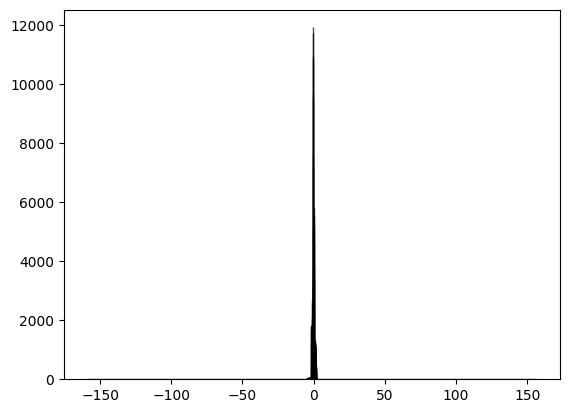

In [60]:
# 选择频率最高的深度为参考海平面
heights = df['Height (m MSL)'].values
hist, bin_edges = np.histogram(heights, bins='auto')
most_frequent_bin = np.argmax(hist)
most_frequent_height_range = (bin_edges[most_frequent_bin], bin_edges[most_frequent_bin + 1])
print("最频繁出现的高度范围是:", most_frequent_height_range)
sea_level = (most_frequent_height_range[0] + most_frequent_height_range[1]) / 2
print(f"假设海平面: {sea_level} m")

# 显示频率直方图
plt.hist(heights, bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.show()